<h2 align='center'> Deep Face Experiments </h2>

In [153]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from PIL import Image

<h3> Verify Face (Recognition)</h3>

In [159]:
results=DeepFace.verify(img1_path='Database\Shah Rukh Khan\\1.jpg',img2_path='test_img.jpg')
results

{'verified': True,
 'distance': 0.39392914889034203,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 74, 'y': 187, 'w': 360, 'h': 360},
  'img2': {'x': 269, 'y': 50, 'w': 138, 'h': 138}},
 'time': 1.52}

<h3> Draw Bounding Box </h3>

Target Face: 


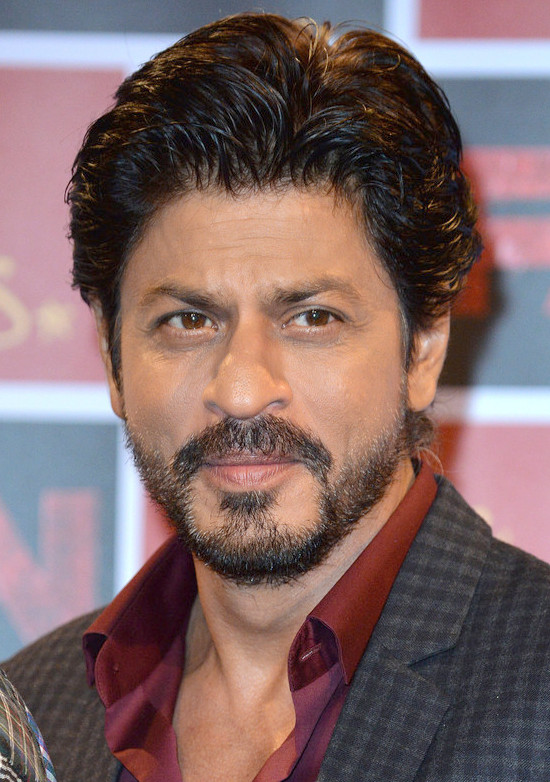

Group of Faces: 


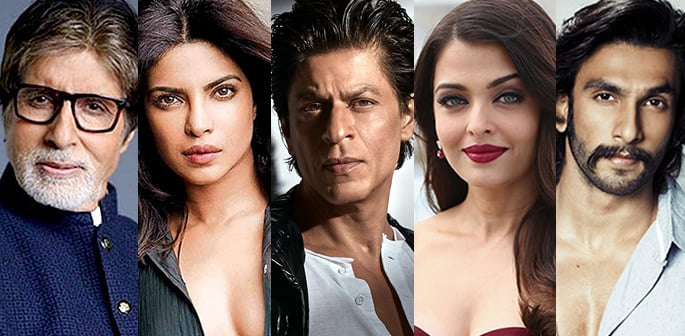

Found the Face in following Coordiantes: 

	 Coordinates of interest: {'x': 269, 'y': 50, 'w': 138, 'h': 138}


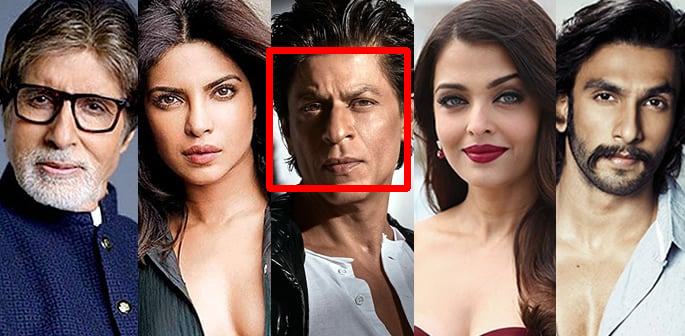

In [168]:
print('Target Face: ')
img_1=cv2.imread('Database\Shah Rukh Khan\\1.jpg')
display(Image.fromarray(cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB)))

print('Group of Faces: ')
img_2=cv2.imread('test_img.jpg')
display(Image.fromarray(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)))

print('Found the Face in following Coordiantes: \n')
coords=results['facial_areas']['img2']
print(f'\t Coordinates of interest: {coords}')


img=cv2.imread('test_img.jpg')
cv2.rectangle(img,(coords['x'],coords['y']),(coords['x']+coords['w'],coords['y']+coords['h']),(0,0,255),5)
display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))


<h3> Streaming Code </h3>

In [ ]:
DeepFace.stream(db_path = "./")


<h3> Custom Face Recognition Model </h3>

In [147]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    try:
        results = DeepFace.find(frame, db_path='Database')
        # Iterate over each result
        for result in results:
            result = result.drop_duplicates(subset=['source_x', 'source_y', 'source_w', 'source_h'])
            result=result.loc[result['VGG-Face_cosine']<=0.35]
            # Extract coordinates and names
            coordinates = result[['source_x', 'source_y', 'source_w', 'source_h']].values.tolist()
            names = [(i.replace('\\', '/')).split('/')[1] for i in result['identity'].tolist()]
            
            # Draw bounding boxes and names on the frame
            for (x, y, w, h), name in zip(coordinates, names):
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
                cv2.rectangle(frame, (x, y - 20), (x + w, y), (255, 0, 0), -1)
                cv2.putText(frame, name, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.40, (255, 255, 255), 1)
        
    except:
        pass
    
    cv2.imshow('output', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
